In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from matplotlib import font_manager, rc
plt.style.use('seaborn')
rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [2]:
dat = pd.read_csv('ufcdata/data.csv')

In [3]:
df = dat.copy()

## EDA

#### 2001.04.01이전 삭제 (ufc규칙 발표되기 이전)

In [4]:
limit_date = '2001-04-01'
df = df[(df['date'] > limit_date)]
print(df.shape)

(4887, 145)


#### 결측치 확인

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
print(f'Number of Features in data with missing values: {len(missing[missing > 0])}\n')
print(missing[missing > 0])

Number of Features in data with missing values: 108

B_avg_opp_CLINCH_landed         1136
B_avg_TD_landed                 1136
B_avg_opp_TD_att                1136
B_avg_opp_TD_pct                1136
B_avg_opp_TOTAL_STR_att         1136
B_avg_opp_TOTAL_STR_landed      1136
B_avg_opp_BODY_landed           1136
B_total_time_fought(seconds)    1136
B_avg_opp_BODY_att              1136
B_avg_TOTAL_STR_landed          1136
B_avg_TOTAL_STR_att             1136
B_avg_TD_pct                    1136
B_avg_TD_att                    1136
B_avg_opp_SIG_STR_pct           1136
B_avg_KD                        1136
B_avg_LEG_att                   1136
B_avg_SUB_ATT                   1136
B_avg_SIG_STR_pct               1136
B_avg_SIG_STR_landed            1136
B_avg_SIG_STR_att               1136
B_avg_REV                       1136
B_avg_PASS                      1136
B_avg_LEG_landed                1136
B_avg_opp_CLINCH_att            1136
B_avg_opp_SUB_ATT               1136
B_avg_opp_TD_landed   

#### 편의를 위해 결측치 삭제

In [6]:
drop_na = df[df['B_avg_opp_TD_att'].isnull()].index
df = df.drop(drop_na, axis=0)
drop_na = df[df['R_avg_opp_TD_att'].isnull()].index
df = df.drop(drop_na, axis=0)
drop_na = df[df['Winner'].isnull()].index
df = df.drop(drop_na, axis=0)

In [7]:
for column in df.columns:
    if df[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df[column].isnull().sum()}")


Nan in Referee: 16
Nan in B_Stance: 74
Nan in B_Height_cms: 1
Nan in B_Reach_cms: 172
Nan in R_Stance: 76
Nan in R_Reach_cms: 41
Nan in B_age: 14
Nan in R_age: 2


In [8]:
df.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.4,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.9,0.4,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.6,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,

In [9]:
df.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,3549.000000,3549.000000,3549.000000,3549.0,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3548.000000,3377.000000,3549.000000,3549.000000,3549.000000,3549.0,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,35

#### 불필요한 변수 삭제

In [10]:
df.drop(['B_draw', 'R_draw'], axis = 1, inplace = True)
df = df[df['Winner'] != 'Draw']
df = df.drop(columns=['R_fighter','B_fighter','Referee','location','R_Stance','B_Stance'])

In [11]:
for column in df.columns:
    if df[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df[column].isnull().sum()}")

Nan in B_Height_cms: 1
Nan in B_Reach_cms: 172
Nan in R_Reach_cms: 41
Nan in B_age: 14
Nan in R_age: 2


팀에 따른 winner 분포

In [12]:
values = df.Winner.value_counts()
labels = values.index
colors = ['red','blue','green']
trace = go.Pie(labels = labels,
              values = values,
              marker = dict(colors = colors)
              )
layout = go.Layout(title='Winner Distribution by Corner Color')
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [13]:
B_win_by = df[['B_win_by_Decision_Majority',
    'B_win_by_Decision_Split',
    'B_win_by_Decision_Unanimous',
    'B_win_by_KO/TKO',
    'B_win_by_Submission',
    'B_win_by_TKO_Doctor_Stoppage']]
R_win_by = df[['R_win_by_Decision_Majority',
    'R_win_by_Decision_Split',
    'R_win_by_Decision_Unanimous',
    'R_win_by_KO/TKO',
    'R_win_by_Submission',
    'R_win_by_TKO_Doctor_Stoppage']]
b_winby = B_win_by.sum(axis=0)
r_winby = R_win_by.sum(axis=0)

In [14]:
b_winby

B_win_by_Decision_Majority        82.0
B_win_by_Decision_Split         1035.0
B_win_by_Decision_Unanimous     3813.0
B_win_by_KO/TKO                 4170.0
B_win_by_Submission             2603.0
B_win_by_TKO_Doctor_Stoppage     210.0
dtype: float64

In [15]:
r_winby

R_win_by_Decision_Majority       125.0
R_win_by_Decision_Split         1252.0
R_win_by_Decision_Unanimous     5315.0
R_win_by_KO/TKO                 5575.0
R_win_by_Submission             3357.0
R_win_by_TKO_Doctor_Stoppage     297.0
dtype: float64

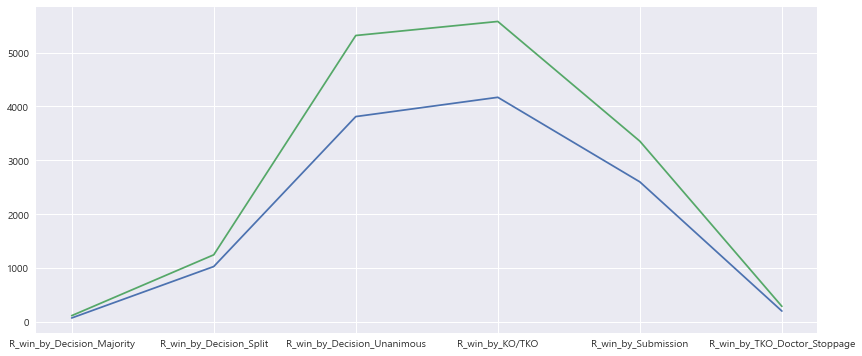

In [16]:
b_winby.plot(kind='line', figsize=(14,6))
r_winby.plot(kind='line', figsize=(14,6))
plt.show()

### red가 더 많이 이기기도 했고 대부분 승은 만장일치나 KO , Submission으로 판정나는군

In [17]:
pd.value_counts(df['weight_class'][df['Winner']=='Red'])

Lightweight              469
Welterweight             449
Middleweight             345
Light Heavyweight        252
Heavyweight              208
Featherweight            193
Bantamweight             157
Flyweight                 88
Women's Strawweight       59
Women's Bantamweight      39
Women's Flyweight         17
Catch Weight               7
Women's Featherweight      1
Name: weight_class, dtype: int64

In [18]:
pd.value_counts(df['weight_class'][df['Winner']=='Blue'])

Welterweight             243
Lightweight              230
Middleweight             163
Featherweight            128
Bantamweight             108
Light Heavyweight        105
Heavyweight               93
Flyweight                 53
Women's Strawweight       39
Women's Bantamweight      32
Women's Flyweight         12
Catch Weight               3
Women's Featherweight      3
Name: weight_class, dtype: int64

#### 거의 모든 계급에서 red팀이 blue보다 두배가까이 많이 이기는데 뭐가 영향을 미치는거지

#### ufc 얼마나 개최됐을까?

In [19]:
df['year'] = df['date'].apply(lambda x : x.split('-')[0])

In [20]:
red =df['year'][df['Winner']=='Red'].value_counts(ascending=True)
blue =df['year'][df['Winner']=='Blue'].value_counts(ascending=False)

red.name = 'red'
blue.name = 'blue'

In [21]:
red

2001     18
2003     20
2004     23
2002     34
2005     40
2019     81
2006     90
2007    103
2010    114
2011    118
2008    139
2009    151
2012    158
2013    167
2017    190
2014    197
2018    200
2015    218
2016    223
Name: red, dtype: int64

In [22]:
blue

2018    169
2015    165
2016    158
2017    148
2014    133
2013    102
2012     92
2019     85
2011     83
2010     77
Name: blue, dtype: int64

In [23]:
wins = pd.concat([red,blue], axis=1,sort=True)
wins.index.name='year'

In [24]:
fig = go.Figure(data=[
    go.Bar(name='Blue', x=wins.index, y=wins.blue),
    go.Bar(name='Red', x=wins.index, y=wins.red)
])

fig.update_layout(barmode='stack')
fig.show()

#### 대부분 red가 이겼고 최근 10년간 blue도 이기기 시작했네!? 그럼 연도에 따라 blue팀에 변화가 생겼을까?
#### 찾아보니 ufc 관련 기업이 병합을 하면서 규칙이 2010년에 새로 개정됨 (가장 최근 개정된 규칙)

In [25]:
def split_datas(feature_name,count=True):
    
    base_date = '2010-01-01'
    before = df[(df['date'] < base_date)]
    after = df[(df['date'] >= base_date)]
    
    if count==True:
        b_red = before[feature_name][df['Winner']=='Red'].value_counts(ascending=False)
        b_blue = before[feature_name][df['Winner']=='Blue'].value_counts(ascending=False)
        a_red = after[feature_name][df['Winner']=='Red'].value_counts(ascending=False)
        a_blue = after[feature_name][df['Winner']=='Blue'].value_counts(ascending=False)
        
    elif count==False:
        b_red = before[feature_name][df['Winner']=='Red']
        b_blue = before[feature_name][df['Winner']=='Blue']
        a_red = after[feature_name][df['Winner']=='Red']
        a_blue = after[feature_name][df['Winner']=='Blue']
    else : 
        print("You need 'count'parameter!")
        
    b_red.name = 'b_red'
    a_red.name = 'a_red'
    b_blue.name = 'b_blue'
    a_blue.name = 'a_blue'
    
    data = pd.concat([b_red,b_blue,a_red,a_blue], axis=1, sort=True)
    data.index.name = 'index'
    return data

## weight_class

In [26]:
weight_data = split_datas('weight_class', count = True)
weight_data

,b_red,b_blue,a_red,a_blue
index,,,,
Bantamweight,NaN,NaN,157,108
Catch Weight,4.0,NaN,3,3
Featherweight,NaN,NaN,193,128
Flyweight,NaN,NaN,88,53
Heavyweight,78.0,NaN,130,93
Light Heavyweight,108.0,NaN,144,105
Lightweight,138.0,NaN,331,230
Middleweight,134.0,NaN,211,163
Welterweight,156.0,NaN,293,243


In [27]:
weight_data.index

Index(['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women's Bantamweight', 'Women's Featherweight',
       'Women's Flyweight', 'Women's Strawweight'],
      dtype='object', name='index')

In [28]:
def print_plot(df, barmode='stack'):
    fig = go.Figure(data=[
        go.Bar(name='B_red', x=df.index, y=df.iloc[:,0]),
        go.Bar(name='B_blue',x=df.index, y=df.iloc[:,1]),
        go.Bar(name='A_red', x=df.index, y=df.iloc[:,2]),
        go.Bar(name='A_blue',x=df.index,y =df.iloc[:,3])
    ])
    fig.update_layout(barmode='stack')
    fig.show()


In [29]:
print_plot(weight_data)

**무게가 2010년 사실 이전과 이후 비중이 시합이 더 적어서 이렇게 나타나는 것으로 보임. <br>
이전 경기 수가 최근과 비슷했다면 비중도 비슷해질 것 같음 <br>
그렇기 때문에 이전 데이터는 없어도 될 것 같다**

In [30]:
def red_split(feature_name,count=False):
    
    base_date = '2010-01-01'
    before = df[(df['date'] < base_date)]
    after = df[(df['date'] >= base_date)]
    
    if count==False:
        b_red = before[feature_name][df['Winner']=='Red']
        a_red = after[feature_name][df['Winner']=='Red']
           
    elif count==True:
        b_red = pd.DataFrame(before[feature_name][df['Winner']=='Red'].value_counts(ascending=False))
        a_red = pd.DataFrame(after[feature_name][df['Winner']=='Red'].value_counts(ascending=False))
       
    else:
        print("You need 'count'parameter!")   
        
    return b_red, a_red    
        

In [31]:
def blue_split(feature_name,count=False):
    
    base_date = '2010-01-01'
    before = df[(df['date'] < base_date)]
    after = df[(df['date'] >= base_date)]
    
    if count==False:
        b_blue = before[feature_name][df['Winner']=='Blue']
        a_blue = after[feature_name][df['Winner']=='Blue']
        
    elif count==True:
        b_blue = before[feature_name][df['Winner']=='Blue'].value_counts(ascending=False)
        a_blue = after[feature_name][df['Winner']=='Blue'].value_counts(ascending=False)
    
    else:
        print("You need 'count'parameter!")

    return b_blue, a_blue

In [32]:
df.shape

(3496, 138)

In [33]:
base_date = '2010-01-01'
before = df[(df['date'] < base_date)]
after = df[(df['date'] >= base_date)]

In [34]:
Bb_win_by = before[['B_win_by_Decision_Majority',
    'B_win_by_Decision_Split',
    'B_win_by_Decision_Unanimous',
    'B_win_by_KO/TKO',
    'B_win_by_Submission',
    'B_win_by_TKO_Doctor_Stoppage']]

Ba_win_by = after[['B_win_by_Decision_Majority',
    'B_win_by_Decision_Split',
    'B_win_by_Decision_Unanimous',
    'B_win_by_KO/TKO',
    'B_win_by_Submission',
    'B_win_by_TKO_Doctor_Stoppage']]


Rb_win_by = before[['R_win_by_Decision_Majority',
    'R_win_by_Decision_Split',
    'R_win_by_Decision_Unanimous',
    'R_win_by_KO/TKO',
    'R_win_by_Submission',
    'R_win_by_TKO_Doctor_Stoppage']]

Ra_win_by = after[['R_win_by_Decision_Majority',
    'R_win_by_Decision_Split',
    'R_win_by_Decision_Unanimous',
    'R_win_by_KO/TKO',
    'R_win_by_Submission',
    'R_win_by_TKO_Doctor_Stoppage']]

bb_winby = Bb_win_by.sum(axis=0)
ba_winby = Ba_win_by.sum(axis=0)
rb_winby = Rb_win_by.sum(axis=0)
ra_winby = Ra_win_by.sum(axis=0)

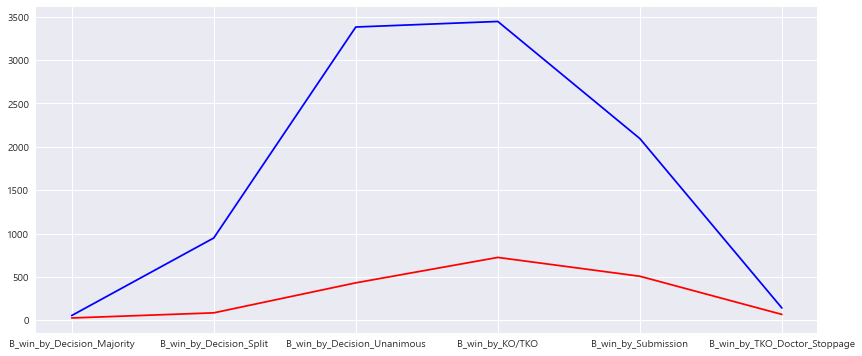

In [35]:
bb_winby.plot(kind='line', figsize=(14,6),c='r')
ba_winby.plot(kind='line', figsize=(14,6),c='b')
plt.show()

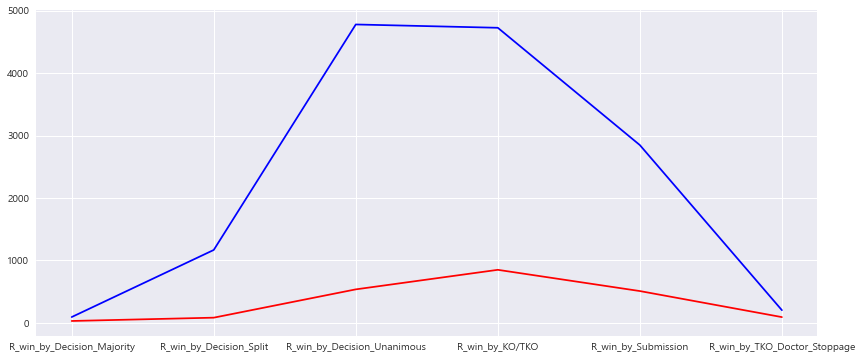

In [36]:
rb_winby.plot(kind='line', figsize=(14,6),c='r')
ra_winby.plot(kind='line', figsize=(14,6),c='b')
plt.show()

#### 뭐로 이겼는가는 큰 차이 없음

## _avg_TOTAL_STR_att

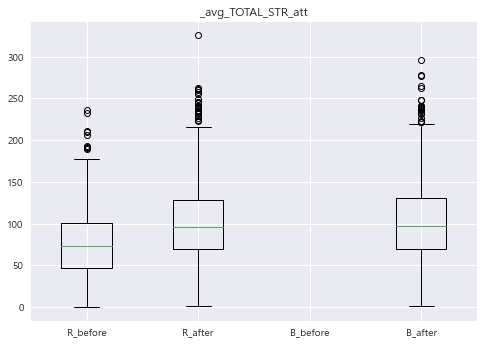

In [37]:
Rb_str_att, Ra_str_att = red_split('R_avg_TOTAL_STR_att')
Bb_str_att, Ba_str_att = blue_split('B_avg_TOTAL_STR_att')

fig, ax = plt.subplots()
ax.boxplot([Rb_str_att.values, Ra_str_att.values,Bb_str_att.values, Ba_str_att.values ])
plt.title('_avg_TOTAL_STR_att')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_TOTAL_STR_landed

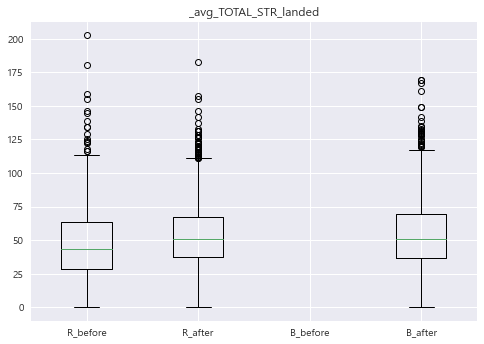

In [38]:
Rb_body_att, Ra_body_att = red_split('R_avg_TOTAL_STR_landed')
Bb_body_att, Ba_body_att = blue_split('B_avg_TOTAL_STR_landed')

fig, ax = plt.subplots()
ax.boxplot([Rb_body_att, Ra_body_att, Bb_body_att, Ba_body_att ])
plt.title('_avg_TOTAL_STR_landed')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_BODY_att

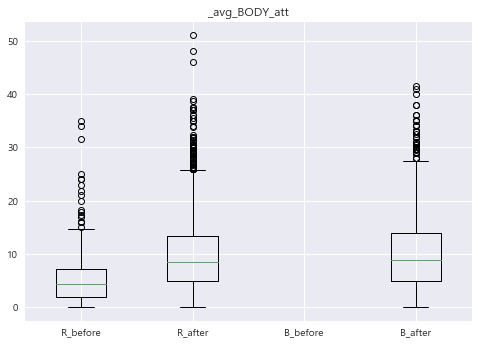

In [39]:
Rb_body_att, Ra_body_att = red_split('R_avg_BODY_att')
Bb_body_att, Ba_body_att = blue_split('B_avg_BODY_att')

fig, ax = plt.subplots()
ax.boxplot([Rb_body_att, Ra_body_att, Bb_body_att, Ba_body_att ])
plt.title('_avg_BODY_att')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_BODY_landed

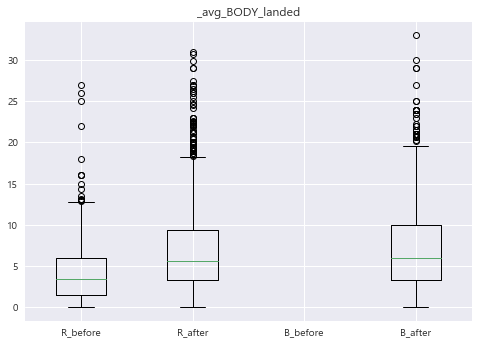

In [40]:
Rb, Ra = red_split('R_avg_BODY_landed')
Bb, Ba = blue_split('B_avg_BODY_landed')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_BODY_landed')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

#### 이거를 보면 뭔가 시도가 더 중요한듯?

## _avg_CLINCH_att

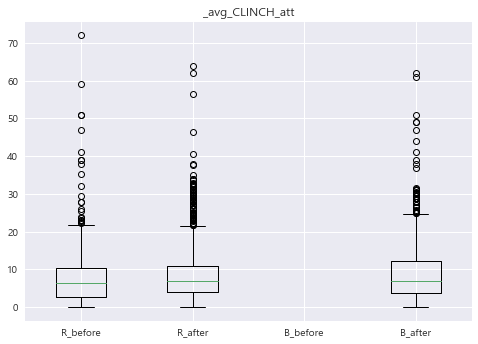

In [41]:
Rb, Ra = red_split('R_avg_CLINCH_att')
Bb, Ba = blue_split('B_avg_CLINCH_att')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_CLINCH_att')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_CLINCH_landed

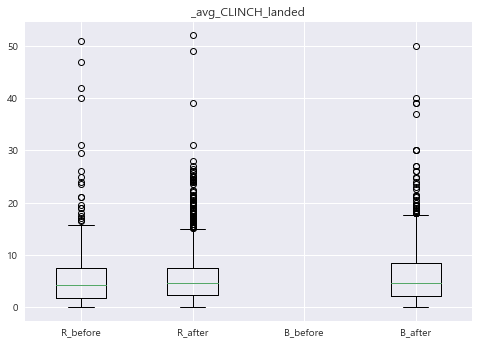

In [42]:
Rb, Ra = red_split('R_avg_CLINCH_landed')
Bb, Ba = blue_split('B_avg_CLINCH_landed')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_CLINCH_landed')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_DISTANCE_att

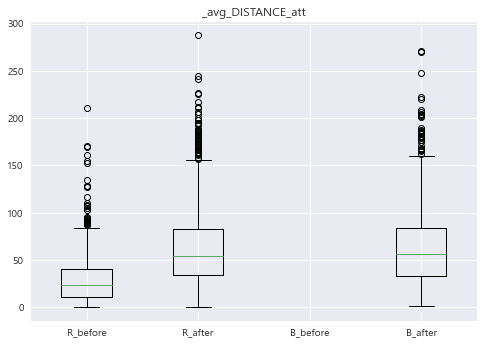

In [43]:
Rb, Ra = red_split('R_avg_DISTANCE_att')
Bb, Ba = blue_split('B_avg_DISTANCE_att')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_DISTANCE_att')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_DISTANCE_landed

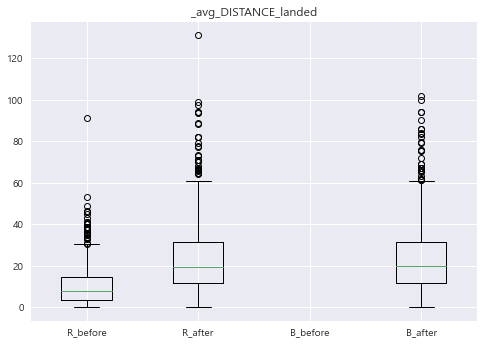

In [44]:
Rb, Ra = red_split('R_avg_DISTANCE_landed')
Bb, Ba = blue_split('B_avg_DISTANCE_landed')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_DISTANCE_landed')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_GROUND_att

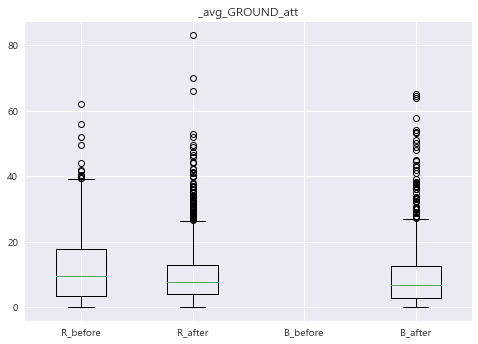

In [45]:
Rb, Ra = red_split('R_avg_GROUND_att')
Bb, Ba = blue_split('B_avg_GROUND_att')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_GROUND_att')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_GROUND_landed

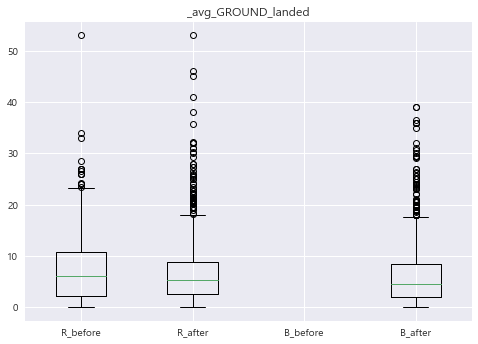

In [46]:
Rb, Ra = red_split('R_avg_GROUND_landed')
Bb, Ba = blue_split('B_avg_GROUND_landed')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_GROUND_landed')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_HEAD_att

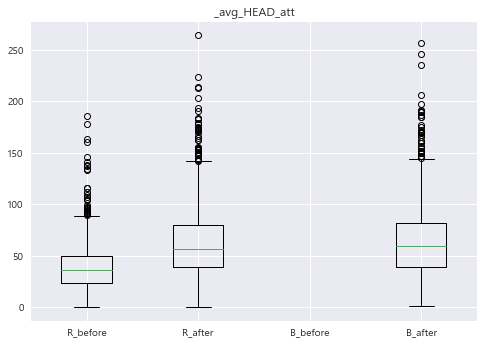

In [47]:
Rb, Ra = red_split('R_avg_HEAD_att')
Bb, Ba = blue_split('B_avg_HEAD_att')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_HEAD_att')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

## _avg_HEAD_landed

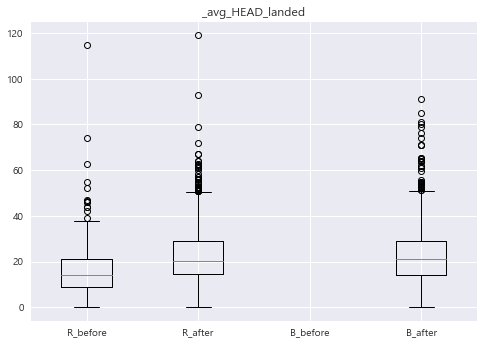

In [48]:
Rb, Ra = red_split('R_avg_HEAD_landed')
Bb, Ba = blue_split('B_avg_HEAD_landed')

fig, ax = plt.subplots()
ax.boxplot([Rb, Ra, Bb, Ba])
plt.title('_avg_HEAD_landed')
plt.xticks([1, 2, 3, 4], 

           ['R_before', 'R_after','B_before','B_after'])
plt.show()

### 상관관계

In [49]:
corr_matrix = df.corr(method = 'pearson').abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                 .astype(np.bool))
                 .stack()
                 .sort_values(ascending=False)
      )
print(sol[0:10])

R_avg_opp_HEAD_att      R_avg_opp_SIG_STR_att    0.983956
B_avg_opp_HEAD_att      B_avg_opp_SIG_STR_att    0.982278
B_avg_HEAD_att          B_avg_SIG_STR_att        0.979104
B_avg_LEG_att           B_avg_LEG_landed         0.979062
B_avg_opp_LEG_att       B_avg_opp_LEG_landed     0.977231
R_avg_HEAD_att          R_avg_SIG_STR_att        0.977198
R_avg_LEG_att           R_avg_LEG_landed         0.975742
R_avg_opp_LEG_att       R_avg_opp_LEG_landed     0.971823
R_avg_GROUND_att        R_avg_GROUND_landed      0.971089
R_avg_opp_DISTANCE_att  R_avg_opp_SIG_STR_att    0.970633
dtype: float64
